# Max-Cut Sample - Hybrid


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import dwave_networkx as dnx
import dimod

### Helper Functions

In [2]:
def draw_graph(G,cut,pos):
    colors = [ 'g' if n in cut else 'r' for n in G.nodes() ]
    nx.draw(G,with_labels=False,alpha=0.6,node_size=50,node_color=colors,pos=pos)
    
def cut_size(G,cut):
    edges = 0
    for c in cut:
        for n in G.neighbors(c):
            if n not in cut:
                edges += 1
    return edges
    


## Problem as Graph

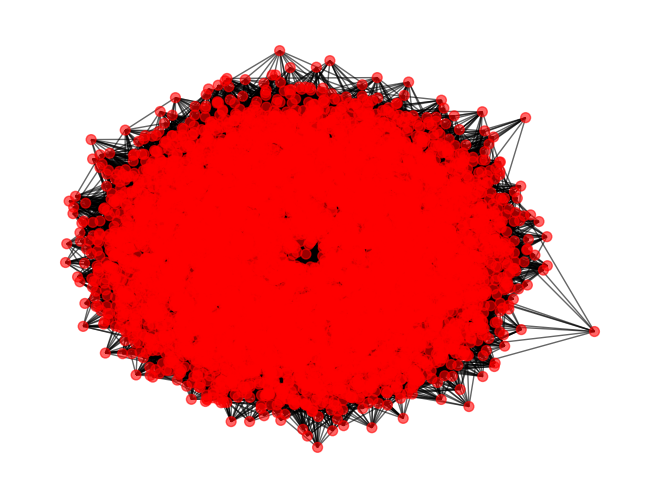

In [3]:
# fixed graph
#G = nx.Graph()
#G.add_nodes_from([0,1,2,3,4])
#G.add_edges_from([(0,1),(1,2),(2,3),(3,0),(0,4),(2,4),(3,4),(1,4)])

# loaded sample graph
G = nx.read_edgelist('../sample_graphs/7000-nodes-sample.dat',nodetype=int)

#n = 4
#p = 0.3
#H = nx.gnp_random_graph(n, p)
pos = nx.spring_layout(G)

#nx.draw(G,with_labels=True,alpha=0.6,node_size=300,pos=pos)
draw_graph(G,{},pos)

In [4]:
print('Graph: ',len(G.nodes()), 'nodes, density: ',nx.density(G))

Graph:  7000 nodes, density:  0.003992529545037046


## Exact Solver

In [5]:
exactsolver = dimod.ExactSolver()

In [6]:
#import time

#ts_start = time.time()
#cut = dnx.maximum_cut(G, exactsolver)
#ts_stop = time.time()
#print(cut)
#print('elapsed time of exact solver (s): ',round(ts_stop - ts_start,2))

In [7]:
#draw_graph(G,cut,pos)

In [8]:
#print('cut-size: ',cut_size(G,cut))

## Hybrid Solver

In [9]:
from dwave.system import LeapHybridSampler

label = 'max-cut, n: ' + str(len(G.nodes())) + ', d: ' + str(round(nx.density(G),2)) + ' hybrid'

hybridsampler = LeapHybridSampler()
cut = dnx.maximum_cut(G, hybridsampler,label=label)

In [10]:
cut

{1,
 2,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 13,
 14,
 16,
 17,
 18,
 20,
 21,
 22,
 23,
 24,
 33,
 35,
 37,
 38,
 39,
 40,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 55,
 58,
 59,
 60,
 61,
 63,
 66,
 67,
 69,
 70,
 72,
 74,
 75,
 77,
 81,
 82,
 83,
 85,
 86,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 102,
 106,
 109,
 110,
 117,
 118,
 120,
 122,
 125,
 126,
 127,
 129,
 130,
 131,
 133,
 134,
 135,
 137,
 138,
 139,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 150,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 166,
 169,
 170,
 171,
 174,
 176,
 179,
 183,
 185,
 186,
 188,
 191,
 195,
 196,
 197,
 198,
 199,
 201,
 202,
 205,
 207,
 208,
 209,
 210,
 211,
 212,
 215,
 216,
 218,
 224,
 225,
 229,
 234,
 239,
 241,
 242,
 245,
 247,
 249,
 250,
 253,
 254,
 257,
 258,
 262,
 263,
 264,
 266,
 267,
 271,
 273,
 275,
 277,
 278,
 282,
 283,
 284,
 286,
 288,
 291,
 292,
 293,
 295,
 298,
 299,
 301,
 302,
 304,
 310,
 312,
 313,
 314,
 315,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 327,
 329,

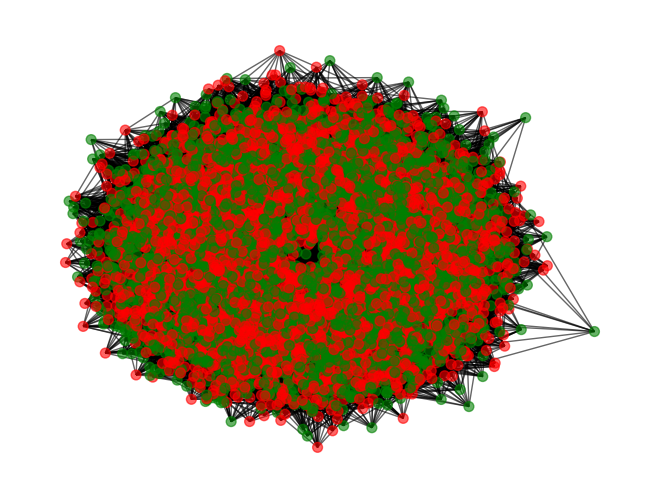

In [11]:
draw_graph(G,cut,pos)

In [12]:
print('cut-size: ',cut_size(G,cut))

cut-size:  62830


In [13]:
len(list(G.neighbors(3455)))

22